# coorelation

In [2]:
import numpy as np
import pandas as pd
x = [10,15,7,2,16]
y = [13,0,7,4,11]
X = np.stack((x,y), axis = 0)
print("Coorelation coefficient is : ")
print(np.corrcoef(X))

Coorelation coefficient is : 
[[1.         0.10707661]
 [0.10707661 1.        ]]


In [3]:
# using dataset
# Model the relationship between Head Size ( cm^3 )
# Brain Weight ( gram ) is the outcome or dependent Y variable

df = pd.read_csv('headbrain.csv')
print(df)

     Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0         1          1             4512                 1530
1         1          1             3738                 1297
2         1          1             4261                 1335
3         1          1             3777                 1282
4         1          1             4177                 1590
..      ...        ...              ...                  ...
232       2          2             3214                 1110
233       2          2             3394                 1215
234       2          2             3233                 1104
235       2          2             3352                 1170
236       2          2             3391                 1120

[237 rows x 4 columns]


In [6]:
x = df['Head Size(cm^3)']
y = df['Brain Weight(grams)']
X = np.stack((x,y), axis = 0)
print("Coorelation cofiecient is : ")
print(np.corrcoef(X))

Coorelation cofiecient is : 
[[1.         0.79956971]
 [0.79956971 1.        ]]


In [7]:
np.corrcoef(df)

array([[1.        , 0.99996532, 0.99962559, ..., 0.99999747, 0.99994701,
        0.99995385],
       [0.99996532, 1.        , 0.99936303, ..., 0.99998153, 0.99999807,
        0.99983915],
       [0.99962559, 0.99936303, 1.        , ..., 0.99956148, 0.99929092,
        0.99984233],
       ...,
       [0.99999747, 0.99998153, 0.99956148, ..., 1.        , 0.99996764,
        0.99992969],
       [0.99994701, 0.99999807, 0.99929092, ..., 0.99996764, 1.        ,
        0.99980195],
       [0.99995385, 0.99983915, 0.99984233, ..., 0.99992969, 0.99980195,
        1.        ]])

In [10]:
x = df.iloc[:,2].values # values conveerts
y = df.iloc[:,3].values # -1 means that 

z = np.stack((x,y), axis = 0)
z
print('Coorelation is : ')
print(np.corrcoef(z))

Coorelation is : 
[[1.         0.79956971]
 [0.79956971 1.        ]]


# Linear Regression

Slope(m) :  [[0.26342934]]
Intercept(c) :  [325.57342105]
Root mean squared error :  5201.3840280023305
R2 score :  0.639311719957


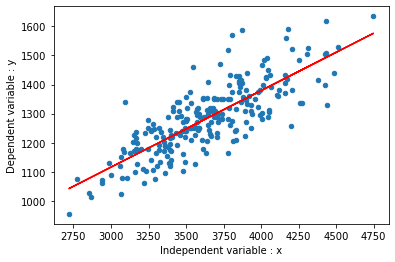

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

'''

'''

data = pd.read_csv('headbrain.csv')
# values converts it into a numpy array
x = data.iloc[:,2].values.reshape(-1,1)
# -1 means that calculation the dimension of row, but have 1 column
y = data.iloc[:,3].values.reshape(-1,1)

# sckit-learn implementation 
# Model intialization
regression_model = LinearRegression()
# Fit the data ( train the model )
regression_model.fit(x,y)
# predict
y_predicted = regression_model.predict(x)
# model evaluation
rmse = mean_squared_error(y,y_predicted)
r2 = r2_score(y,y_predicted)
# printing values
print('Slope(m) : ', regression_model.coef_)
print('Intercept(c) : ', regression_model.intercept_)
print('Root mean squared error : ',rmse)
print('R2 score : ', r2)

# ploting values
# data points
plt.scatter(x, y, s = 20)
plt.xlabel('Independent variable : x')
plt.ylabel('Dependent variable : y')
# predicted values
plt.plot(x, y_predicted, color = 'r')
plt.show()


### Linear Regression manually

Intercept(c):
b_0 = 4.32 
slope(m) = 0.4


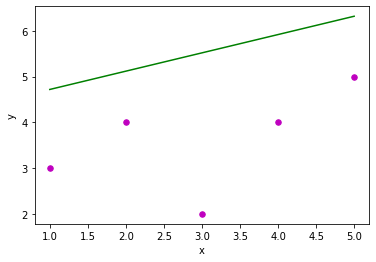

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def estimate_coef(x, y):
    # number of observations/point
    n =np.size(x)
    
    # mean of x and y vector
    m_x, m_y = np.mean(x), np.mean(y)
    
    # calculating cross-evaluation and deviation
    SS_xy  = np.sum(y * x) - n * m_y * m_x
    SS_xx = np.sum(x * x) - n * m_x * m_x
    
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y * b_1 * m_x
    
    return (b_0, b_1)

def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m", marker = "o", s = 30)
    
    # predicted response vector
    y_pred = b[0]+ b[1] * x
    
    # plotting the regression line
    plt.plot(x, y_pred, color = 'g')
    
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
    
    # function to show plot
    plt.show()

def main():
    x = np.array([1, 2, 3, 4, 5])
    y = np.array([3, 4, 2, 4, 5])
    
    # estimating coefficients
    b = estimate_coef(x, y)
    print("Intercept(c):\nb_0 = {} \nslope(m) = {}".format(b[0],b[1]))
    
    # plotting regression line
    plot_regression_line(x, y, b)

main()

Intercept(c):
b_0 = 2.4 
Slope(m) = 0.4


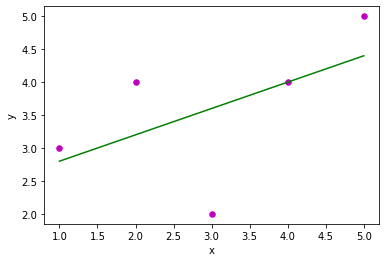

In [19]:
def estimate_coef(x,y):
    n = np.size(x)
    m_x, m_y = np.mean(x), np.mean(y)
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
    b_1 = SS_xy/SS_xx
    b_0 = m_y-b_1*m_x
    
    return (b_0, b_1)

def plot_reg_line(x,y,b):
    plt.scatter(x,y,color = 'm', marker = 'o', s = 30)
    y_pred = b[0]+b[1] * x
    plt.plot(x, y_pred, color = 'g')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
def main():
    x = np.array([1,2,3,4,5])
    y = np.array([3,4,2,4,5])
    
    b = estimate_coef(x, y)
    print('Intercept(c):\nb_0 = {} \nSlope(m) = {}'.format(b[0], b[1]))
    plot_reg_line(x,y,b)
    
main()